# Supervised Learning

## Parametric models

### Linear Regression

In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

&nbsp;

# 1 OLS Regression with `statsmodels`

* to install `conda install statsmodels` or `pip install statsmodels`    
* uses package <a href = 'http://patsy.readthedocs.io/en/latest/'>pasty</a> which allows passing **R** style formulas.  
* contains a large number of modules for statistical testing and model estimation <a href= 'http://www.statsmodels.org/stable/py-modindex.html'>Link</a>

## 1.1 data cleaning

In [4]:
filepath = 'data/homes.csv'
dataset = pd.read_csv(filepath, header = 0, sep = ',')

dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
dataset.shape

(21613, 21)

In [5]:
dataset.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
dataset.id = dataset.id.astype('category')
dataset.waterfront = dataset.waterfront.astype('category')
dataset.view = dataset.view.astype('category')
dataset.grade = dataset.grade.astype('category')
dataset.condition = dataset.condition.astype('category')
dataset = dataset.drop(['zipcode'], axis = 1)
dataset = dataset.drop(['sqft_living15'], axis = 1)
dataset = dataset.drop(['sqft_lot15'], axis = 1)

* this dataset is collected in 2015 and the latest year for a home build or renovated is 2015.      
* for the columns `yr_built` and `yr_renovated` to keep them as numeric variables it is better to convert the values in these column in the form of an offset from 2015. 

In [7]:
dataset.yr_built = [2015 - yr for yr in dataset.yr_built]

dataset.yr_renovated = [2015 - yr if yr != 0 else yr for yr in dataset.yr_renovated]

&nbsp;

<span style='color:blue'>in two steps using `map()` and `lambda()` operator convert the date column into a numpy `datetime64`   
how do you think you can go about this task given a date variable with `20141013T000000` format?</span>

In [8]:
#skipped code

In [7]:
#skipped code
new_date = list(map(lambda x: x.split('T')[0], dataset.date))
new_date = list(map(lambda x: np.datetime64('-'.join([x[0:4], x[4:6], x[6:9]])), new_date))

In [9]:
dataset.date = new_date

In [10]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045


&nbsp;
* convert the `id` column a dataframe index

In [12]:
dataset = dataset.set_index(['id'])

dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
id,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,60,0,47.5112,-122.257
6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,64,24,47.7210,-122.319
5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,0,47.7379,-122.233
2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,50,0,47.5208,-122.393
1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,28,0,47.6168,-122.045


&nbsp;

<span style="color:blue">rearrange the columns in the dataset to push the four cateorical variables to the very end.</span>    


* in addition purge the last two columns

In [13]:
#skipped code

In [14]:
#skipped code
new_cols = dataset.columns[0:7].tolist() + dataset.columns[11:15].tolist() + dataset.columns[7:11].tolist()
dataset = dataset[new_cols]

In [15]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,waterfront,view,condition,grade
id,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,1180,0,60,0,0,0,3,7
6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,2170,400,64,24,0,0,3,7
5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,770,0,82,0,0,0,3,6
2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,1050,910,50,0,0,0,5,7
1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,1680,0,28,0,0,0,3,8


In [16]:
dataset.dtypes

date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
waterfront             category
view                   category
condition              category
grade                  category
dtype: object

&nbsp;

## 1.2 pair plots and correlations

In [17]:
# this takes a long time to process
#sns.pairplot(dataset.iloc[:,1:11], diag_kind = 'kde')

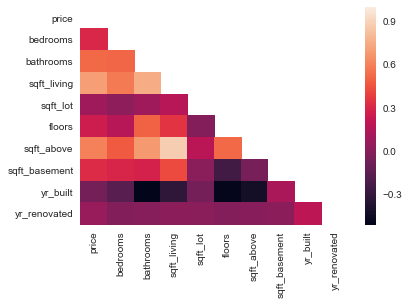

In [18]:
corr = dataset.iloc[:,1:11].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white") # options include white, dark, whitegrid, darkgrid, ticks
sns.heatmap(corr, mask = mask)

* there is a strong positive correlation between `sqft_above` (Square footage of house apart from basement) and `sqrt_living`
(Square footage of the living room) at 0.876597

In [19]:
dataset = dataset.drop(['sqft_above'], axis = 1)

&nbsp;

## 1.3 model estimation and diagnostics

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\U208359\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`train_test_split(*array, test_size = .25, train_size, random_state, shuffle = True)`

test_size/train_size: 
        * float => proportion of data      
        * int => absolute number of observations


In [21]:
d_train, d_test = train_test_split(dataset, test_size = 0.2, random_state = 43)

In [22]:
d_train.shape, d_test.shape

((17290, 14), (4323, 14))

&nbsp;


* we shall perform a **hedonic regression** using the homes dataset after cleaning.

* for this we do not require the `date` column

In [23]:
d_train = d_train.drop(['date'], axis = 1)
d_test = d_test.drop(['date'], axis = 1)

&nbsp;

statsmodels requires that the function call be passed in be a string in the format `output ~ input_! + input_2 + ... input_n`

In [24]:
function_call = 'price ~ ' + ' + '.join(d_train.columns[1:].values)

In [25]:
function_call

'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_basement + yr_built + yr_renovated + waterfront + view + condition + grade'

In [26]:
lmod = smf.ols(function_call , data = d_train)

In [27]:
results = lmod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1334.
Date:                Mon, 06 Aug 2018   Prob (F-statistic):               0.00
Time:                        22:49:07   Log-Likelihood:            -2.3600e+05
No. Observations:               17290   AIC:                         4.721e+05
Df Residuals:                   17261   BIC:                         4.723e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -9.907e+04   2.05e+05     

In [28]:
print('F statistic:   ',results.fvalue)
print('F stat pvalue: ',results.f_pvalue)
print('r squared:     ',results.rsquared)
print('r squared adj: ',results.rsquared_adj)
print('residuals df:  ',results.df_resid)
print('SST:           ',results.mse_total*(results.df_resid + results.df_model))
print('SSE:           ',results.mse_resid*results.df_resid)
print('SSM:           ',results.mse_model*results.df_model)
print('resid std err: ',results.mse_resid**.5)

F statistic:    1333.6370595409321
F stat pvalue:  0.0
r squared:      0.6838808981829576
r squared adj:  0.6833681043210216
residuals df:   17261.0
SST:            2298239305833903.5
SSE:            726517345120836.9
SSM:            1571721960713066.8
resid std err:  205158.73726142477


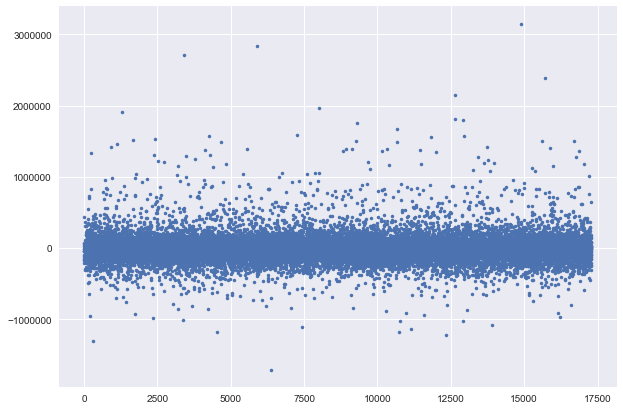

In [29]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,7))
plt.plot(np.arange(d_train.shape[0]),results.resid, '.')

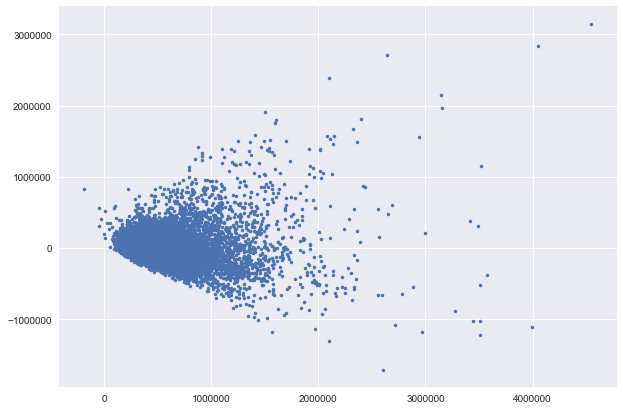

In [30]:
plt.figure(figsize=(10,7))
plt.plot(results.fittedvalues, results.resid, '.')

## 1.4 model Validation 

In [31]:
lmod_pred = results.predict(d_test)

In [32]:
mse_prediction = 1/(d_test.shape[0])*np.sum((lmod_pred - d_test.price)**2)
mse_prediction

46928911868.828125

<span style='color:blue'>what do you think about the value of MSE ?</span>

&nbsp;

we can also calculate the `mean_squared_error` using the method with the same name from `sklearn.metrics`.

In [33]:
mean_squared_error(y_true = d_test.price, y_pred = lmod_pred)

46928911868.828125

In [34]:
scipy.stats.kstest(results.resid, 'norm')

KstestResult(statistic=0.531578947368421, pvalue=0.0)

C:\Users\U208359\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


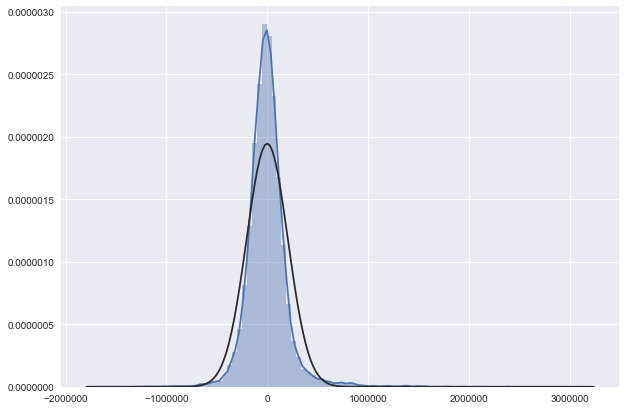

In [35]:
plt.figure(figsize=(10,7))
sns.distplot(results.resid, bins = 100, fit = scipy.stats.norm)

[-5, 5, -15, 15]

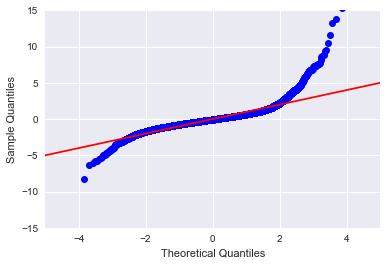

In [36]:
sm.qqplot(results.resid, dist = scipy.stats.norm ,fit = True, line='45')
plt.axis([-5,5,-15,15])

&nbsp;

<span style='color:blue'>can we do anything to make the residuals Gaussian ?</span>

In [37]:
#skipped code


In [38]:
#skipped code
function_call_1 = 'np.log(price) ~ ' + ' + '.join(d_train.columns[1:].values)
function_call_1

'np.log(price) ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_basement + yr_built + yr_renovated + waterfront + view + condition + grade'

In [39]:
lmod_1 = smf.ols(function_call_1, data = d_train)

results_1 = lmod_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1152.
Date:                Mon, 06 Aug 2018   Prob (F-statistic):               0.00
Time:                        22:49:09   Log-Likelihood:                -4327.3
No. Observations:               17290   AIC:                             8713.
Df Residuals:                   17261   BIC:                             8938.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.4238      0.311     

&nbsp;

&nbsp;


In [40]:
print('F statistic:   ',results_1.fvalue)
print('F stat pvalue: ',results_1.f_pvalue)
print('r squared:     ',results_1.rsquared)
print('r squared adj: ',results_1.rsquared_adj)
print('residuals df:  ',results_1.df_resid)
print('SST:           ',results_1.mse_total*(results.df_resid + results.df_model))
print('SSE:           ',results_1.mse_resid*results.df_resid)
print('SSM:           ',results_1.mse_model*results.df_model)
print('resid std err: ',results_1.mse_resid**.5)

F statistic:    1151.6506641596886
F stat pvalue:  0.0
r squared:      0.6513437739111785
r squared adj:  0.6507781998233222
residuals df:   17261.0
SST:            4789.719785859246
SSE:            1669.9656245606432
SSM:            3119.7541612986033
resid std err:  0.3110432560050618


`F statistic:    1151.65066416
F stat pvalue:  0.0
r squared:      0.651343773911
r squared adj:  0.650778199823
residuals df:   17261.0
SST:            4789.71978586
SSE:            1669.96562456
SSM:            3119.7541613
resid std err:  0.311043256005`

&nbsp;

<span style='color:blue'>first plot `results.resid` followed by `results_1.resid` vs `results_1.fittedvalues` (similar to the previous plots)      
what do you think about the residuals? </spab>

In [41]:
#different plotting package
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

&nbsp;

plot results.resid for a quick comparison

In [42]:
p = figure(plot_width = 800, plot_height = 400)
p.scatter(range(d_train.shape[0]), results.resid, color = 'purple')
show(p)

In [43]:
p = figure(plot_width = 800, plot_height = 400)
p.scatter(range(d_train.shape[0]), results_1.resid, color = 'purple')
show(p)

In [44]:
p = figure(plot_width = 700, plot_height = 400)
p.scatter(results_1.fittedvalues, results_1.resid, color = 'purple')
show(p)

&nbsp;

* predicting the test set

In [45]:
lmod_pred_1 = results_1.predict(d_test)

In [46]:
mse_prediction = 1/(d_test.shape[0])*np.sum((lmod_pred_1 - np.log(d_test.price))**2)
mse_prediction

0.09606646504595927

In [47]:
np.exp(mse_prediction)

1.1008322284271692

In [48]:
np.exp(mse_prediction)

1.1008322284271692

In [49]:
scipy.stats.kstest(results_1.resid, 'norm')

KstestResult(statistic=0.2646948751917363, pvalue=0.0)

C:\Users\U208359\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


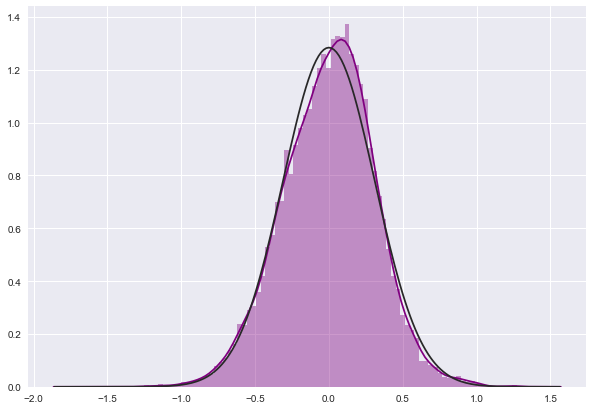

In [50]:
plt.figure(figsize=(10,7))
sns.distplot(results_1.resid, bins = 100, fit = scipy.stats.norm, color = 'purple')

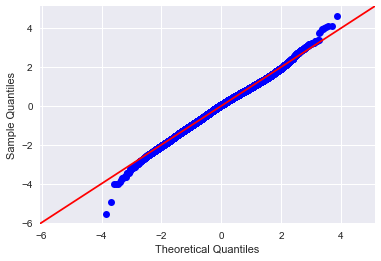

In [51]:
fig = sm.qqplot(results_1.resid, dist = scipy.stats.norm ,fit = True, line='45')
plt.show()

&nbsp;

* can we infer anything from the Jarque-Bera test of normality ?

In [52]:
scipy.stats.jarque_bera(results_1.resid)

(121.22404872466515, 0.0)

* the Jarque-Bera test is a test for normality that is based on sample skewness and kurtosis with     
`H0: the distribution is normal`       
`H1: the distribution is not normal`.   



* the calculated statistic $JB = \frac{N}{6} \bigg(S^2 + \frac{(K-3)^2}{4} \bigg)$   
* with a sample size > 2000 the test statistic is compared to a $\chi^2$ distribution with 2 degrees of freedom. 

C:\Users\U208359\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


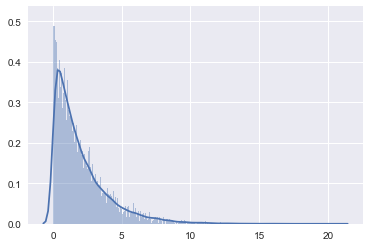

In [53]:
# this is what a chi-square distribution with df=2 looks like
np.random.seed(40)
chisq_sim = np.random.chisquare(2, 20000)
sns.distplot(chisq_sim, bins = 1000)

* despite the fact that the Jarque-Bera test is conclusive, and there is enough evidence to reject the null, the JB statistic went from 266387.882 to 121.22. However for a p-value to not reject the Null the JB statistic needs to approximately between 0 and 4.

&nbsp;

# 2 OLS Regression using `scikit-learn`


* scikit learn does not ingest categorical variables passed into the method input. instead all categorical variable need to be processed prior to running the model estimate. 

In [54]:
dataset.dtypes, dataset.shape

(date             datetime64[ns]
 price                     int64
 bedrooms                  int64
 bathrooms               float64
 sqft_living               int64
 sqft_lot                  int64
 floors                  float64
 sqft_basement             int64
 yr_built                  int64
 yr_renovated              int64
 waterfront             category
 view                   category
 condition              category
 grade                  category
 dtype: object, (21613, 14))

## 2.1 encoding categorical variables

* `scikit-learn` does not automatically handle categorical variables.   
* in order to use the `LinearRegression` module and other modules we have to encode all the categorical variable in dummy coding.   

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

`LabelEncoder` is the method that converts categorical non-numeric variables into numeric representation   
`OneHotEncoder` is the method that converts numeric variables into dummy variable  
&nbsp;

In [56]:
[np.unique(dataset.iloc[:,i], return_counts = True) for i in range(10,14)]

[(array([0, 1], dtype=int64), array([21450,   163], dtype=int64)),
 (array([0, 1, 2, 3, 4], dtype=int64),
  array([19489,   332,   963,   510,   319], dtype=int64)),
 (array([1, 2, 3, 4, 5], dtype=int64),
  array([   30,   172, 14031,  5679,  1701], dtype=int64)),
 (array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64),
  array([   1,    3,   29,  242, 2038, 8981, 6068, 2615, 1134,  399,   90,
           13], dtype=int64))]

we have two catagorical variables starting at level `0` and two starting at level `1`

hence these two variables require the use of `LabelEncoder` first.

&nbsp;

the following series of steps are often analogous for different methods of scikit-learn

1- assign the method to a name space (creating an instance of that method)     
**set the paramteres and arguments of the new instance method in this step**

In [57]:
lbc = LabelEncoder()

enc = OneHotEncoder()

2- apply the instance method `.fit` to ingest the data using the method

In [58]:
lbc_condition = lbc.fit(dataset.condition)

3 - apply the instance method `.transform` to interpret the results and produce an output. 

In [59]:
lbc_condition = lbc.transform(dataset.condition)

In [60]:
lbc_condition

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

&nbsp;

steps 3 and 4 can often be combined together in a single expression

In [61]:
lbc_condition = lbc.fit(dataset.condition).transform(dataset.condition).reshape((-1,1))

In [62]:
np.unique(lbc_condition, return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([   30,   172, 14031,  5679,  1701], dtype=int64))

In [63]:
lbc_grade = lbc.fit(dataset.grade).transform(dataset.grade).reshape((-1,1))

In [64]:
cat_array = np.hstack([np.array(dataset.waterfront).reshape((-1,1)), 
                        np.array(dataset.view).reshape((-1,1)), 
                        lbc_condition, lbc_grade])

In [65]:
cat_array

array([[0, 0, 2, 5],
       [0, 0, 2, 5],
       [0, 0, 2, 4],
       ...,
       [0, 0, 2, 5],
       [0, 0, 2, 6],
       [0, 0, 2, 5]], dtype=int64)

In [66]:
fit_obj = enc.fit(cat_array)

cat_vars = fit_obj.transform(cat_array).toarray()

In [67]:
cat_vars

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [68]:
cat_vars.shape

(21613, 24)

&nbsp;

this is good.    

however for the regression problem we the first dummy variable from every category to be removed in order to allow for correct calculation of an intercept 

how can we go about it ?

display the instance methods and attributed of the `fit_obj` calculated above

In [69]:
[i for i in dir(fit_obj) if not i.startswith('_')]

['active_features_',
 'categorical_features',
 'dtype',
 'feature_indices_',
 'fit',
 'fit_transform',
 'get_params',
 'handle_unknown',
 'n_values',
 'n_values_',
 'set_params',
 'sparse',
 'transform']

In [70]:
fit_obj.feature_indices_

array([ 0,  2,  7, 12, 24], dtype=int32)

these indeces represent the first or every group of dummy variables corresponding to the 4 variables.      
the last index is the total number of columns overall. 

In [71]:
['view_'+str(i) for i in range(1,5)]

['view_1', 'view_2', 'view_3', 'view_4']

In [72]:
names_ = ['waterfront1']+\
         ['view_'+str(i) for i in range(1,5)]+\
         ['con_'+str(i) for i in range(2,6)]+\
         ['g_'+str(i) for i in range(3,14)]
names_ 

['waterfront1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'con_2',
 'con_3',
 'con_4',
 'con_5',
 'g_3',
 'g_4',
 'g_5',
 'g_6',
 'g_7',
 'g_8',
 'g_9',
 'g_10',
 'g_11',
 'g_12',
 'g_13']

In [73]:
cat_var_clean = pd.DataFrame(np.delete(cat_vars, fit_obj.feature_indices_[:-1], 1), columns = names_)
cat_var_clean.head()

,waterfront1,view_1,view_2,view_3,view_4,con_2,con_3,con_4,con_5,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [74]:
cat_var_clean.shape

(21613, 20)

* drop the original categorical variables to substitute with the dummy data frames. 

In [75]:
dataset_skl = dataset.drop(['date'], axis = 1).reset_index(drop = True).copy()

#both tables need to have the same index. 
#either drop index of dataset or assign its index value to vat_var_clean

dataset_skl = dataset_skl.drop(['waterfront', 'view', 'grade', 'condition'], axis = 1)

In [76]:
dataset_skl = pd.concat([dataset_skl, cat_var_clean], axis = 1)

In [77]:
dataset_skl.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,waterfront1,...,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13
0,221900,3,1.00,1180,5650,1.0,0,60,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000,3,2.25,2570,7242,2.0,400,64,24,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000,2,1.00,770,10000,1.0,0,82,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000,4,3.00,1960,5000,1.0,910,50,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000,3,2.00,1680,8080,1.0,0,28,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


&nbsp;


## 2.2 Model estimation and diagnistics 

In [78]:
# use the same seed to retrieve an indentical train/test split.
d_train_skl, d_test_skl = train_test_split(dataset_skl, test_size = 0.2, random_state = 43)

In [79]:
from sklearn import linear_model, preprocessing

`sklearn.linear_model` takes an argument for the input and an argument for the output(s) 

In [80]:
train_x = d_train_skl.iloc[:,1:]
train_y = np.log(d_train_skl.iloc[:,0])

&nbsp;


recall the steps from earlier: 

1- create an instance of the method and set the parameters and arguments

In [81]:
ols = linear_model.LinearRegression(fit_intercept = True, normalize = False, copy_X = True)

2- apply the instsance method `.fit` using the variables or input and outpute 

In [82]:
ols_fit = ols.fit(X = train_x, y = train_y)

In [83]:
ols.coef_

array([-2.75593480e-02,  7.74061742e-02,  1.60406858e-04,  4.95401739e-08,
        9.15305389e-02,  4.95931458e-05,  5.78280797e-03, -1.43848356e-03,
        3.07544301e-01,  1.66180929e-01,  8.48539995e-02,  1.16677647e-01,
        2.25010398e-01,  8.10654097e-03,  2.10534439e-01,  2.19706027e-01,
        2.84313547e-01, -4.26744802e-01, -1.02360864e-01, -5.58288988e-02,
        1.60517929e-01,  4.32852081e-01,  6.77586182e-01,  9.19796547e-01,
        1.08329313e+00,  1.21771755e+00,  1.32099958e+00,  1.34652882e+00])

In [84]:
results_1.params[0], ols.intercept_

(11.423793643215513, 11.423793643215708)

&nbsp;

we can compare the coefficients from statsmodels `results` object and sklearn coefficients. 

In [85]:
a = pd.DataFrame(results_1.params, columns = ['statsmodels']).sort_values(by = 'statsmodels').drop(['Intercept'], axis = 0)
b = pd.DataFrame(ols_fit.coef_, columns = ['sklearn']).sort_values(by = 'sklearn').set_index(a.index)
df = pd.concat([b,a], axis = 1).sort_index()
df

,sklearn,statsmodels
bathrooms,7.740617e-02,7.740617e-02
bedrooms,-2.755935e-02,-2.755935e-02
condition[T.2],8.106541e-03,8.106541e-03
condition[T.3],2.105344e-01,2.105344e-01
condition[T.4],2.197060e-01,2.197060e-01
condition[T.5],2.843135e-01,2.843135e-01
floors,9.153054e-02,9.153054e-02
grade[T.10],1.083293e+00,1.083293e+00
grade[T.11],1.217718e+00,1.217718e+00
grade[T.12],1.321000e+00,1.321000e+00


&nbsp;

* in order to obtain the fittedvalues and residuals we have to calculate these manually. 

$$\begin{bmatrix} fitted\ val1 \\ fitted\ val2 \\ . \\ . \\ . \\ fitted\ valN \end{bmatrix} = intercept + 
\begin{bmatrix} x_{1,1} & x_{1,2} & . . . & x_{1,m-1} & x_{1,m} \\ 
                x_{2,1} & \ddots & . . . & x_{2,m-1} & x_{2,m} \\ 
                . & . & \ddots & . & . \\ 
                . & . & . & \ddots  & . \\ 
                x_{n-1,1} & x_{n-1,2} & . . . & x_{n-1,m-1} & x_{n-1,m} \\
                x_{n,1} & x_{n,2} & . . . & x_{n,m-1} & x_{n,m} 
                \end{bmatrix} \times \begin{bmatrix} \theta_{bathrooms} \\ \theta_{bedrooms} \\ . \\ \theta_{grade[T.3]} \\ . \\ \theta_{yr\ renovated} \end{bmatrix}$$
                
&nbsp;                

$$Residuals = Output - Fitted\ Values$$

In [86]:
ols_fittedvalues = ols.intercept_ + np.dot(train_x, ols.coef_)

In [87]:
ols_resids = train_y.values - ols_fittedvalues

In [88]:
p = figure(plot_width = 800, plot_height = 400)
p.scatter(range(train_x.shape[0]), ols_resids, color = 'coral')
show(p)

In [89]:
p = figure(plot_width = 800, plot_height = 400)
p.scatter(ols_fittedvalues, ols_resids, color = 'coral')
show(p)

* the instance method `.score` of the fit object `ols` returns the coefficient of determination $R^2$

In [90]:
ols_rsq = ols.score(X = train_x, y = train_y)
ols_rsq

0.6513437739111785

similarly `fit.rank_` returns the degrees of freedom 

In [91]:
deg_freedom = ols_fit.rank_
deg_freedom

28

&nbsp; 

$adj\_r.squared$ can be calculated manually 

In [92]:
n, k = train_x.shape[0], len(train_x.columns.values)
n , k

(17290, 28)

$adj\_r.squared = 1 - \bigg[\frac{(1 - R^2)(n-1}{n-k-1}\bigg] $

In [93]:
ols_adj_rsq = 1 - ((1 - ols_rsq)*(n-1)/(n-k-1))
ols_adj_rsq

0.6507781998233222

&nbsp;


## 2.3 Model validation 

In [94]:
test_x = d_test_skl.iloc[:,1:]
test_y = np.log(d_test_skl.iloc[:,0])

&nbsp;

3- instead of `.transform()` the method `.predict()` takes the inputs of the test set and calculates a predicted output 

In [95]:
ols_pred = ols_fit.predict(test_x)

In [96]:
mean_squared_error(y_true = test_y, y_pred = ols_pred)

0.0960664650459193

&nbsp;

&nbsp;

### Addendum

instead of using `OneHotEncoder()` the method `pandas.get_dummies()` allows us to convert a categorical variable into dummy variables and allows us to drop the first column by setting an argument within the method call.     
 
 
since this is a pandas method it preserves the index of the original dataframe   

using <U>dataset</U>   

In [97]:
pd_waterfront = pd.get_dummies(dataset.waterfront, drop_first = True)
pd_view = pd.get_dummies(dataset.view, drop_first = True)
pd_condition = pd.get_dummies(dataset.condition, drop_first = True)
pd_grade = pd.get_dummies(dataset.grade, drop_first = True)

In [98]:
pd_condition.head()

,2,3,4,5
id,,,,
7129300520,0,1,0,0
6414100192,0,1,0,0
5631500400,0,1,0,0
2487200875,0,0,0,1
1954400510,0,1,0,0


In [99]:
dataset_d = pd.concat([dataset.iloc[:,1:10], pd_waterfront, pd_view, pd_condition, pd_grade], axis = 1)

In [100]:
dataset_d.columns = dataset.columns[1:10].tolist() + names_

In [101]:
dataset_d.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,waterfront1,...,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900,3,1.00,1180,5650,1.0,0,60,0,0,...,0,0,0,1,0,0,0,0,0,0
6414100192,538000,3,2.25,2570,7242,2.0,400,64,24,0,...,0,0,0,1,0,0,0,0,0,0
5631500400,180000,2,1.00,770,10000,1.0,0,82,0,0,...,0,0,1,0,0,0,0,0,0,0
2487200875,604000,4,3.00,1960,5000,1.0,910,50,0,0,...,0,0,0,1,0,0,0,0,0,0
1954400510,510000,3,2.00,1680,8080,1.0,0,28,0,0,...,0,0,0,0,1,0,0,0,0,0
